In [55]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import statsmodels.api as sm

from sklearn import tree
from sklearn.preprocessing import StandardScaler

from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

2023-11-26 18:31:26.499931: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
# Initial imports
import pandas as pd
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report



import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline

 # Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd


# Importing, cleaning, and describing the data

In [3]:
# Load the data into a Pandas DataFrame
heart_attack_df = pd.read_csv(
    "Resources/heart.csv")

# Display DataFrame

heart_attack_df.head(20)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [4]:
# Get a brief summary of the heart_attack DataFrame.
heart_attack_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
# Generate summary statistics
heart_attack_df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
# check for null values
heart_attack_df.isnull().values.any()     


False

In [7]:
# find duplicates and remove duplicates
heart_attack_df.duplicated()
df = heart_attack_df.drop_duplicates()
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
unique_value_counts = df.nunique()
print(unique_value_counts)

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64


According to the result from the unique value dataframe;

We determined the variables with few unique values as categorical variables, and the variables with high unique values as numeric variables.

Numeric Variables: “age”, “trtbps”, “chol”, “thalach” and “oldpeak ”
Categorical Variables: "sex", "cp", "fbs", "rest_ecg", "exang", "slope", "ca", "thal", "output"

In the next section, we will separate these 2 groups into 2 different lists.

In [9]:
numeric_var = ["age", "trtbps", "chol", "thalachh", "oldpeak"]
categoric_var = ["sex", "cp", "fbs", "restecg", "exng", "slp", "caa", "thall", "output"]
numerical_axis_name = ["Age of the Patient","Resting Bloodpressure","Cholestrol","Maximum Heart Rate","ST Depression"]
categoric_axis_name = ["Gender", "Chest Pain Type", "Fasting Blood sugar", "Resting Electrocardiographic Results",
                      "Exercise Induced Angina", "The Slope of ST Segment", "Number of Major Vessels", "Thalassemia", "Target"]

### Univariate analysis of Numeric Variables 

In [10]:
list(zip(numeric_var, numerical_axis_name))

[('age', 'Age of the Patient'),
 ('trtbps', 'Resting Bloodpressure'),
 ('chol', 'Cholestrol'),
 ('thalachh', 'Maximum Heart Rate'),
 ('oldpeak', 'ST Depression')]

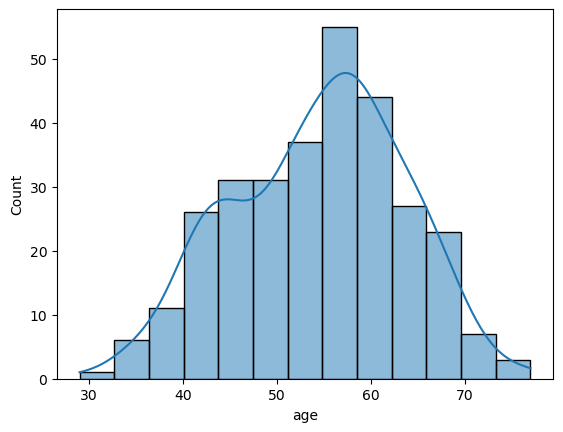

In [11]:
sns.histplot(df["age"], kde=True, edgecolor="k", linewidth=1)

plt.show()

Age Distribution: The age of individuals in the dataset is fairly normally distributed, with a concentration around the 50-60 years age bracket.

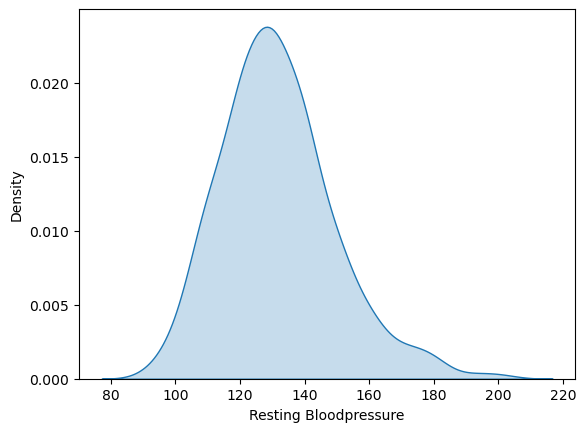

In [12]:
sns.kdeplot(df["trtbps"], shade=True)
plt.xlabel("Resting Bloodpressure")
plt.show()

Resting Blood Pressure Distribution: The distribution of resting blood pressure (trtbps) is somewhat normally distributed, centering around 120-140 mmHg.

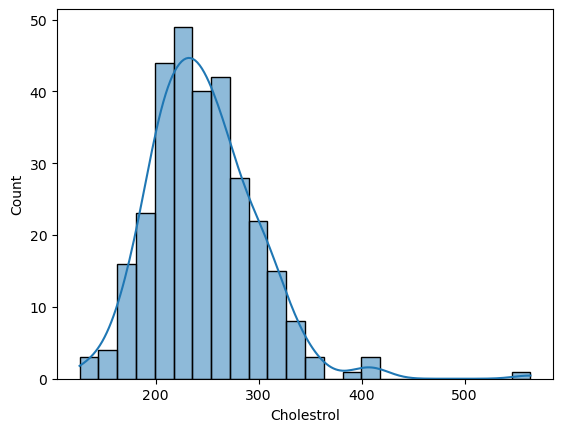

In [13]:
sns.histplot(df["chol"], kde=True, edgecolor="k", linewidth=1)
plt.xlabel("Cholestrol")
plt.show()


Cholesterol Level Distribution: Cholesterol levels show a normal distribution with a concentration around 200-300 mg/dl.

Text(0.5, 0, 'Maximum Heart Rate')

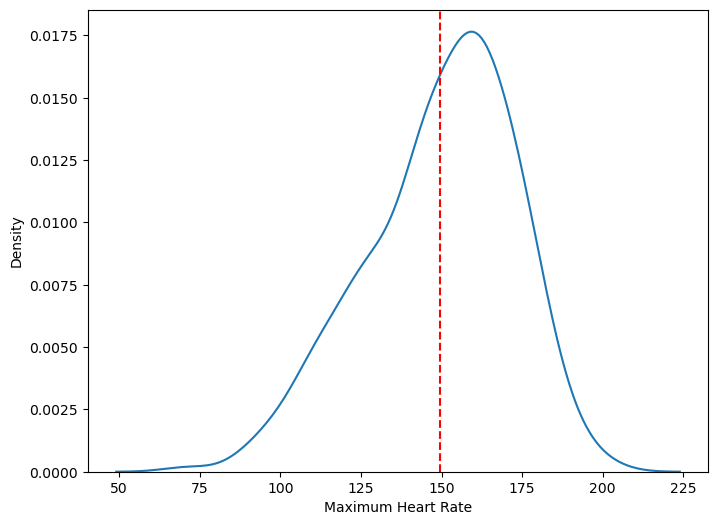

In [14]:
x, y = plt.subplots(figsize = (8,6))
sns.distplot(df["thalachh"], hist = False, ax = y)
y.axvline(df["thalachh"].mean(), color = "r", ls = "--");
plt.xlabel("Maximum Heart Rate")

Analysis of "thalach" variable according to Describe() method
The minimum value of the "thalach" variable is 71. The maximum value is 202. According to these two values, the midpoint value is 137.
The central average is 149.6
So there is a left skew, although not much.
When we examine the quartiles, The 25%, 50%, and 75% sections between the minimum and maximum values are homogeneously distributed.
As a result, the data tends to be normally distributed, but there is a slight left skew.

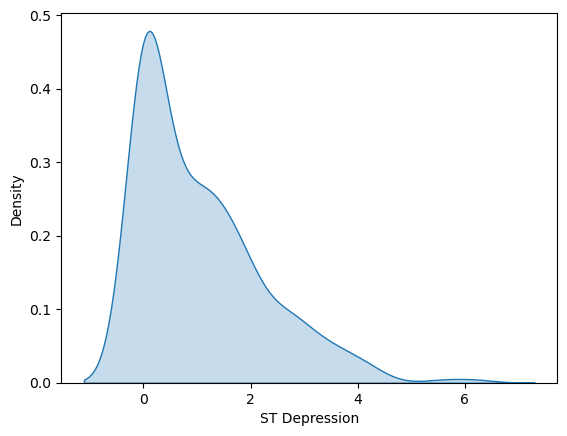

In [15]:
sns.kdeplot(df["oldpeak"], shade=True)
plt.xlabel("ST Depression")
plt.show()

Analysis of "oldpeak" variable according to Describe() method
The minimum value of the "oldpeak" variable is 0, the maximum value is 6.20, so the middle point according to these two values is 3.10
When we look at the mean, we see that it is 1.03
When we examine the quartiles, 75% of the data consists of values up to 1.60
This shows that; There is an incredible right skew in the data.

### Bi-variate analysis of Numeric variables and the output variable

In [16]:
numeric_var.append("output")

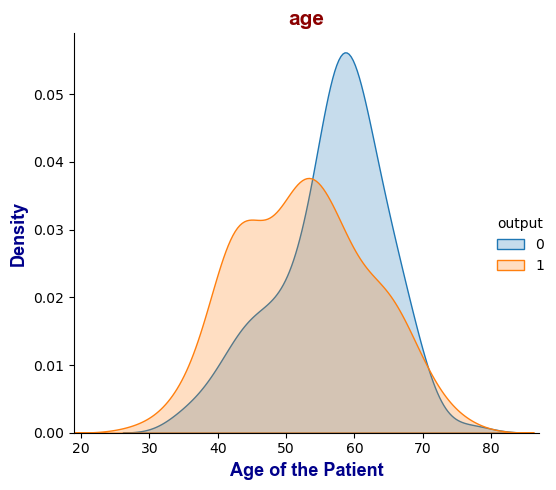

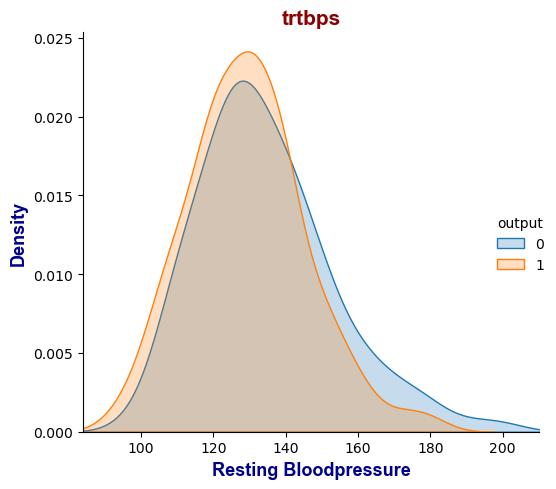

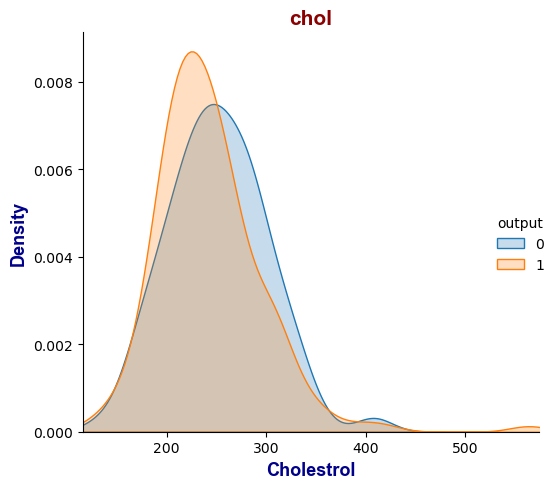

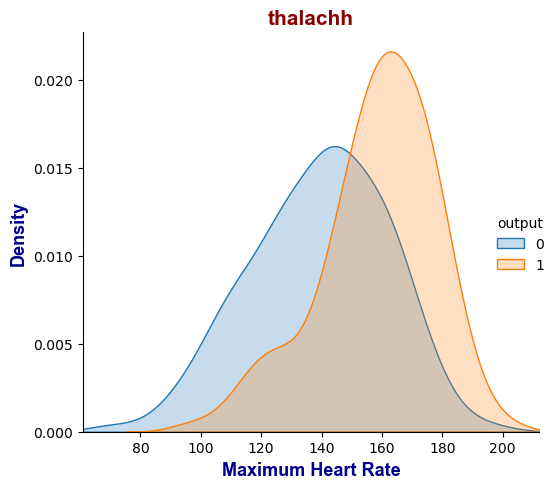

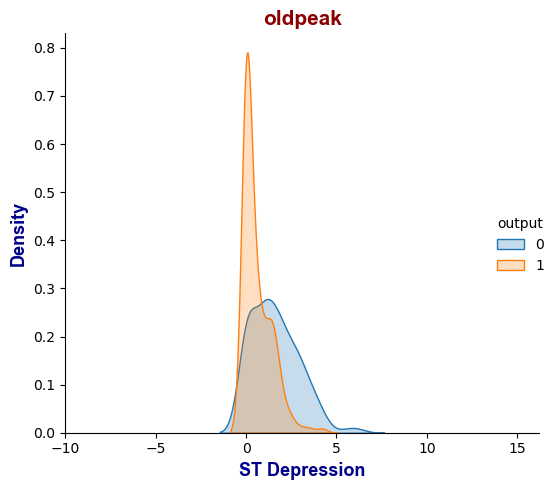

In [17]:
title_font = {"family" : "arial", "color" : "darkred", "weight" : "bold", "size" : 15}
axis_font = {"family" : "arial", "color" : "darkblue", "weight" : "bold", "size" : 13}

for i, z in list(zip(numeric_var, numerical_axis_name)):
    
    graph = sns.FacetGrid(df[numeric_var], hue = "output", height = 5, xlim = ((df[i].min() - 10), (df[i].max() + 10)))
    graph.map(sns.kdeplot, i, shade = True)
    graph.add_legend()
    
    plt.title(i, fontdict = title_font)
    plt.xlabel(z, fontdict = axis_font)
    plt.ylabel("Density", fontdict = axis_font)
    
    plt.tight_layout()
    plt.show()

The KDE plot shows the density of the feature for each value of the target variable. There are usually two-colored humps representing the two values of the Target variable. If the humps are well-separated and non-overlapping, there is a correlation with the Target. If the humps overlap a lot, that means the feature is not well-correlated with the Target because the Target is equally as common on those values of the feature.


### Univariate analysis of Categorical Variables 

In [18]:
list(zip(categoric_var, categoric_axis_name))

[('sex', 'Gender'),
 ('cp', 'Chest Pain Type'),
 ('fbs', 'Fasting Blood sugar'),
 ('restecg', 'Resting Electrocardiographic Results'),
 ('exng', 'Exercise Induced Angina'),
 ('slp', 'The Slope of ST Segment'),
 ('caa', 'Number of Major Vessels'),
 ('thall', 'Thalassemia'),
 ('output', 'Target')]

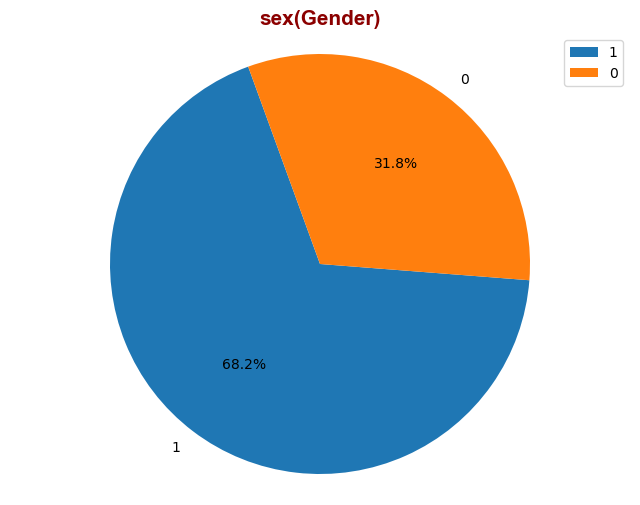

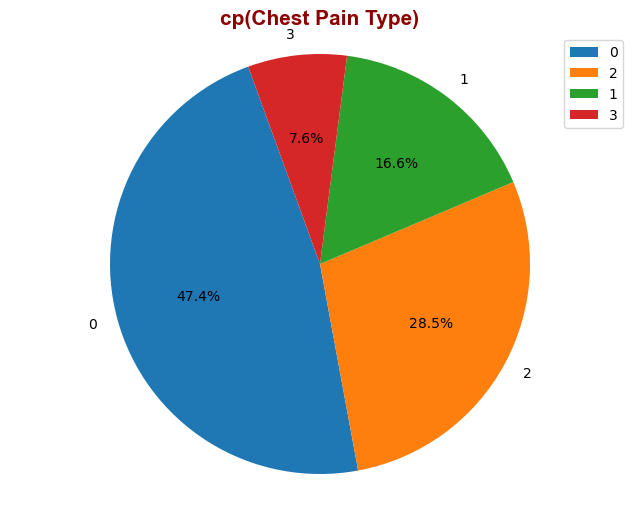

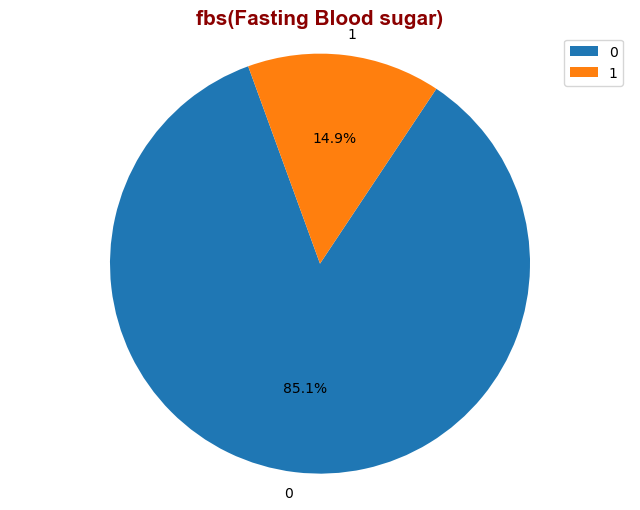

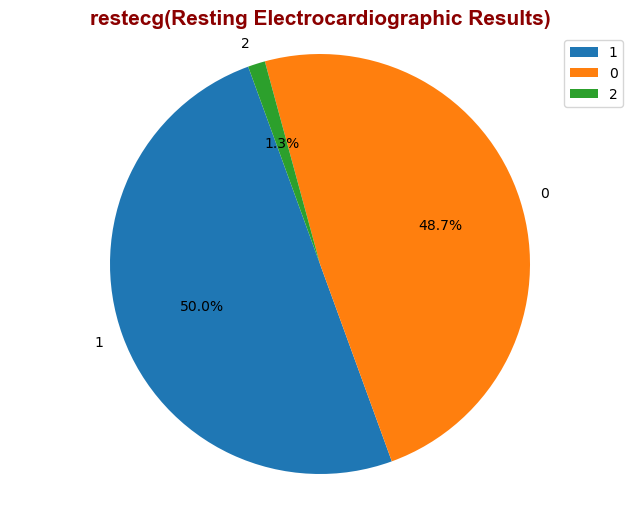

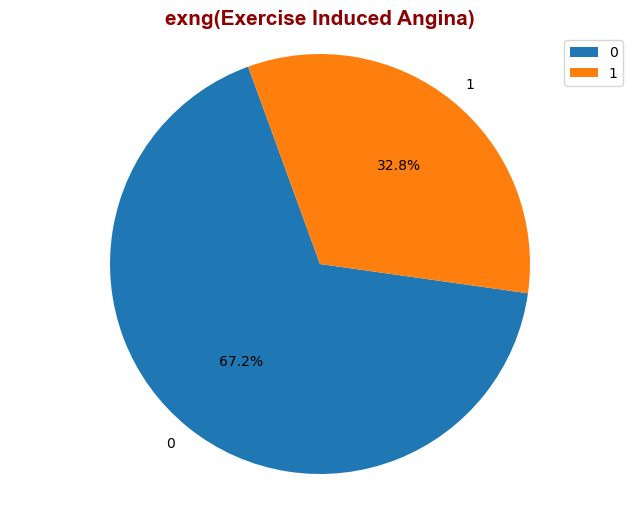

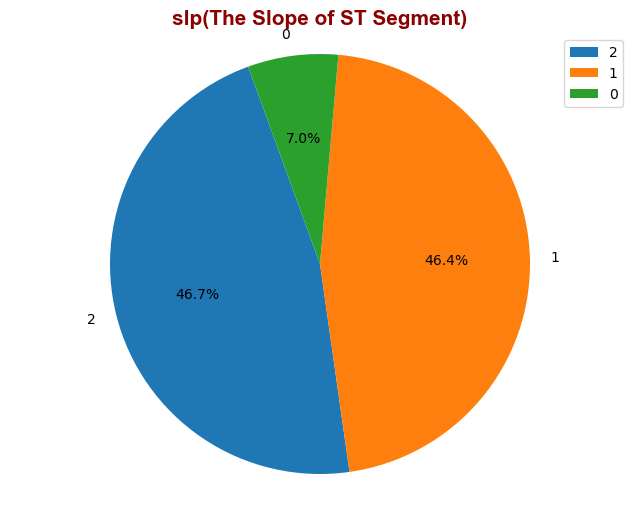

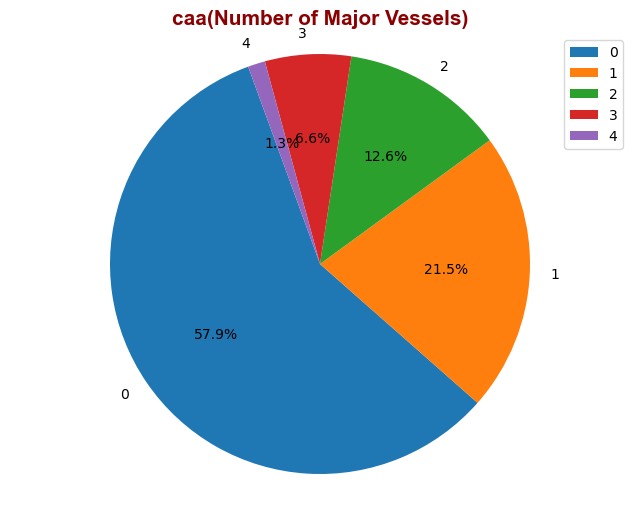

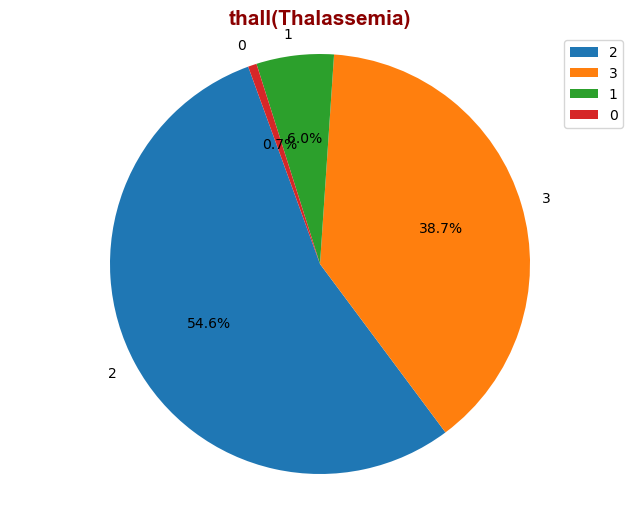

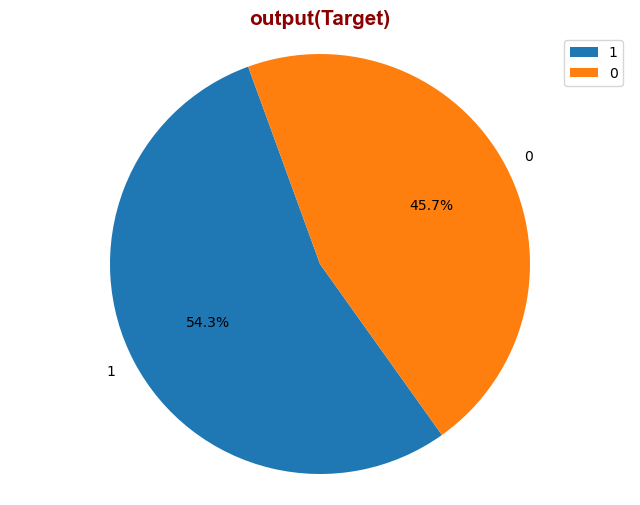

In [19]:
title_font = {"family" : "arial", "color" : "darkred", "weight" : "bold", "size" : 15}
axis_font = {"family" : "arial", "color" : "darkblue", "weight" : "bold", "size" : 13}

for i, z in list(zip(categoric_var, categoric_axis_name)):
    fig, ax = plt.subplots(figsize = (8,6))
    
    observation_values = list(df[i].value_counts().index)
    total_observation_values = list(df[i].value_counts())
    
    ax.pie(total_observation_values, labels= observation_values, autopct = '%1.1f%%', startangle = 110, labeldistance = 1.1)
    ax.axis("equal") 
    
    plt.title((i + "(" + z + ")"), fontdict = title_font) 
    plt.legend()
    plt.show()

Analysis Outputs

Sex Variable
68.2% of the patients are male (1), 31.8% are female(0).
So, the number of male patients is more than twice that of female patients.

Cp Variable
Almost half of the patients have an observation value of 0. In other words, there is asymptomatic angina
Half of the patients are asymptomatic; they have pain without symptoms.
If we examine the other half of the pie chart, 1 out of 4 patients has an observation value of 2.
In other words, atypical angina is in 28.5% of the patients.
This observation value shows patients with shortness of breath or non-classical pain.
The other two observation values are less than the others.
16.6% of patients have a value of 1. In other words, typical angina is seen. Typical angina is the classic exertion pain that comes during any physical activity.
The other 7.6% has the value of non-anginal pain, which is three types of angina.
Non-anginal pain is the term used to describe chest pain that is not caused by heart disease or a heart attack.

Fbs Variable
The vast majority of patients have an observation value of 1. In other words, 85.1%.
The fasting blood sugar of these patients is more than 120 mg/dl.
The remaining 14.9 percent have a less than 120 mg/dl fasting blood glucose level.

Rest_ecg Variable
The thing that draws attention to the image of this variable is that the number of patients with 2 observation values is negligible.
It has a value of 1.3 percent. When we look at all of these patients, it is not a very important number.
This value represents the ST and T wavelengths of the patients.
Another point that draws attention to this graph is; The total numbers of other patients with observation values of 1 and 0 are almost equal.
The size of those with 1, that is, the orange part on the graph is 50.0%
This means that the resting electrocardiographic results of these patients are normal.
The percentage of patients with a value of 0 is 48.7%.
That is, the patients' values of 48.7% are normal.

Exang Variable
We have said that this variable stands for exercise-induced angina.
Angina is the chest pain caused by the coronary artery's involuntary contraction that feeds the heart.
According to the variable "exang," the pain caused by this angina is represented by a value of 1 if it occurs with any exercise and 0 if it does not.
In this context, Values 0 are more than twice as values 1. More than half of the patients do not have exercise-induced angina.

Slope Variable
The minimum observation value is 0 with 7 percent.
This is patients with a downward slope of the ST wavelength.
The other two observation values are almost equal to each other.
The ST wavelength of half of the remaining patients is 1, that is straight, while the observation value of the other half is 2, that is, the ST wavelength is sloped upwards.

Caa variable
This variable is the number of great vessels colored by fluoroscopy.
In more than half of the patients, 57.9 percent, the number of large vessels is 0. That is, the number of large vessels colored by fluoroscopy is absent.
After 0 observation value, the other value with the most slices in the pie chart 1
The number of large vessels observed in 21.5% of the patients is 1
The majority of patients have an occlusion in their veins. Therefore, large vessels cannot be observed with the fluoroscopy technique.

Thal Variable
The "Thal" variable is short for the "Thallium stress test."
The thallium stress test is simply an imaging method that evaluates the amount of blood reaching the heart muscle and determines whether a person has coronary artery disease.
There are three observation values in the description of this variable. However, the pie chart shows four values. Values 0, 1, 2 and 3.
According to our research, the observation value of 0 is null. Therefore, in the next step, 0 observation values will be returned to null and filled with logical data.
In this context, according to the thallium stress test results, 54.6 percent of the patients have 2 observation values, so the test result appears to be expected.
38.7 percent has a value of 3, so we can say that this value is a reversible defect as an explanation.
6.0 percent of patients have a value of 1, so the test result for these patients is a fixed defect.

Target Variable
More than half of the patients, 54.3 percent, have a heart attack risk. The remaining 45.7 percent have no heart attack risk.


### Bi-variate analysis of Categorical variables and the output variable

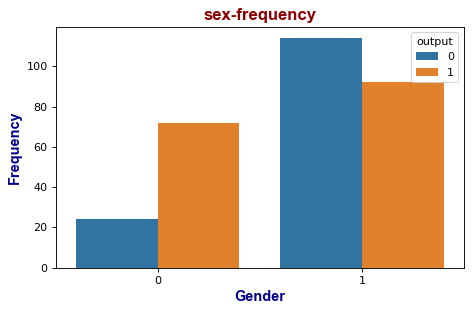

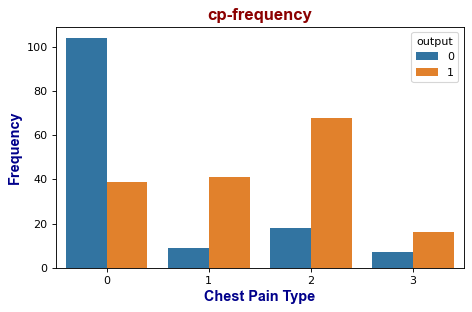

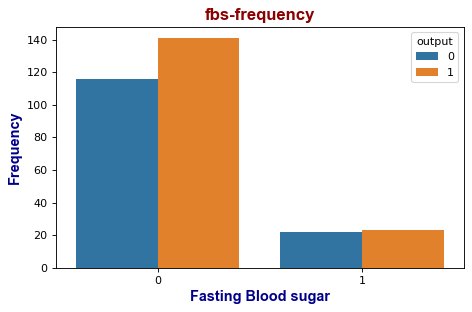

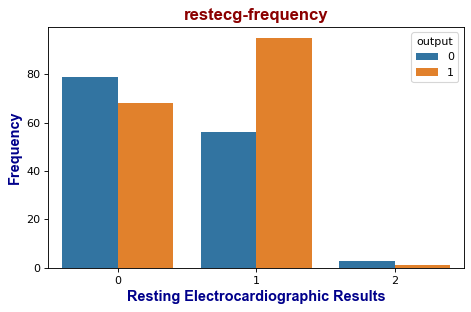

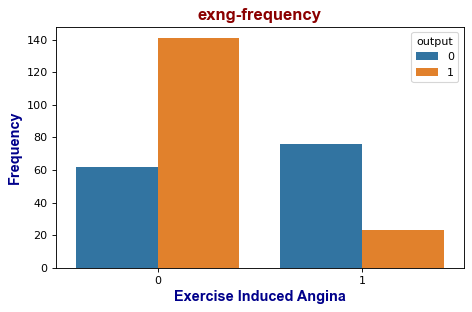

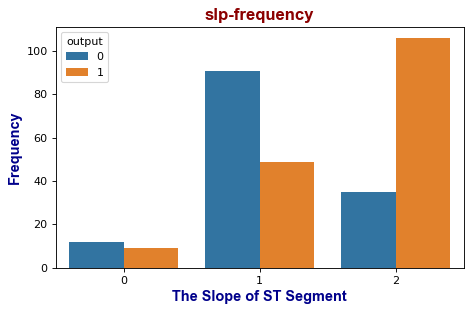

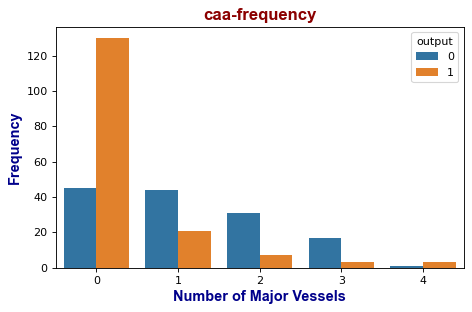

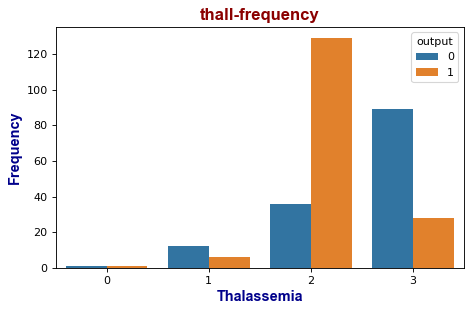

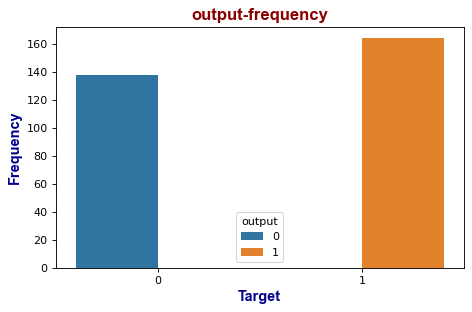

In [21]:
title_font = {"family":"arial","color":"darkred","weight":"bold","size":15}
axis_font = {"family":"arial","color":"darkblue","weight":"bold","size":13}
for i,z in list(zip(categoric_var,categoric_axis_name)):
    plt.figure(figsize=(6,4),dpi=80)
    sns.countplot(data=df[categoric_var],x=i,hue="output")
    plt.title(i+"-frequency",fontdict=title_font)
    plt.xlabel(z,fontdict=axis_font)
    plt.ylabel("Frequency",fontdict=axis_font)
    plt.tight_layout()
    plt.show()

The comparison between individuals with and without heart disease reveals significant differences in several key metrics:

Age: Individuals with heart disease have a lower average age (52.5 years) compared to those without (56.6 years).

Sex: A higher proportion of individuals with heart disease are male (56.36%) compared to those without (82.61%).

Chest Pain Type (cp): Individuals with heart disease have a higher average chest pain type (1.38) compared to those without (0.48).

Resting Blood Pressure (trtbps): Those with heart disease have a slightly lower average resting blood pressure (129.3 mmHg) than those without (134.4 mmHg).

Cholesterol Levels (chol): Individuals with heart disease have lower average cholesterol levels (242.2 mg/dL) compared to those without (251.1 mg/dL).

Fasting Blood Sugar (fbs): Similar proportions of individuals with and without heart disease have fasting blood sugar above 120 mg/dL (13.94% and 15.94%, respectively).

Resting Electrocardiographic Results (restecg): Those with heart disease show a higher average in resting electrocardiographic results (0.59) compared to those without (0.45).

Maximum Heart Rate Achieved (thalachh): Individuals with heart disease have a higher average maximum heart rate (158.47 bpm) than those without (139.10 bpm).

Exercise Induced Angina (exng): A lower proportion of individuals with heart disease experience exercise-induced angina (13.94%) compared to those without (55.07%).

Oldpeak: Individuals with heart disease have a lower average ST depression induced by exercise relative to rest (0.58) compared to those without (1.59).

Slope of the Peak Exercise ST Segment (slp): Those with heart disease have a higher average slope (1.59) compared to those without (1.17).

Number of Major Vessels Colored by Fluoroscopy (caa): Individuals with heart disease have fewer average major vessels colored by fluoroscopy (0.36) than those without (1.17).

Thalassemia (thall): Individuals with heart disease have a lower average thalassemia score (2.12) compared to those without (2.54).

These differences suggest that factors like age, sex, chest pain type, blood pressure, cholesterol levels, maximum heart rate, exercise-induced angina, oldpeak, slope of ST segment, number of vessels detected by fluoroscopy, and thalassemia score could be important in understanding and predicting heart disease.

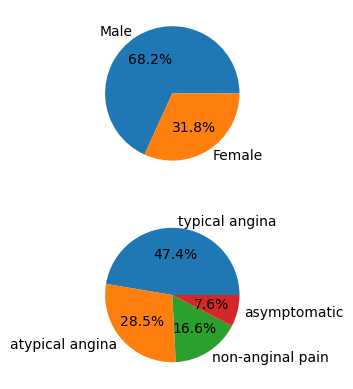

In [11]:
#Create pie chart
fig, (ax1, ax2) = plt.subplots(2)

categories=["Male","Female"]   # 1=Male, 0=Female
ax1.pie(gender_count, labels=categories, autopct='%1.1f%%')

categories=["typical angina","atypical angina", "non-anginal pain", "asymptomatic"]
ax2.pie(chest_pain_count, labels=categories, autopct='%1.1f%%')

plt.subplots_adjust(wspace=0.5)
plt.show()

# Logistic Regression

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

y = df["output"]
X = df.drop(columns="output")


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

# Create the Logistic Regression classifier
classifier = LogisticRegression(solver='lbfgs', max_iter=200, random_state=1)

# Train the classifier
classifier.fit(X_train, y_train)


LogisticRegression(max_iter=200, random_state=1)

In [23]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.8495575221238938
Testing Data Score: 0.868421052631579


In [25]:
predictions = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
results.head()

,Prediction,Actual
0,0,0
1,0,0
2,0,0
3,0,1
4,0,0


In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Display the accuracy score for the test dataset.
accuracy_score(y_test, predictions)

0.868421052631579

In [27]:
#Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)


In [28]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print('\n')
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,28,7
Actual 1,3,38


Accuracy Score : 0.868421052631579


Classification Report
              precision    recall  f1-score   support

           0       0.90      0.80      0.85        35
           1       0.84      0.93      0.88        41

    accuracy                           0.87        76
   macro avg       0.87      0.86      0.87        76
weighted avg       0.87      0.87      0.87        76



The logistic regression model's predictive performance on the test set is as follows:

Accuracy: 87% - This indicates that the model correctly predicted the presence or absence of heart disease in 87% of the cases in the test set.
Precision: 84% - Of all the cases where the model predicted heart disease, 84% actually had heart disease.
Recall: 93% - Of all the actual heart disease cases, the model correctly identified 93%.
F1 Score: 88% - This is the harmonic mean of precision and recall, indicating a balance between the two.

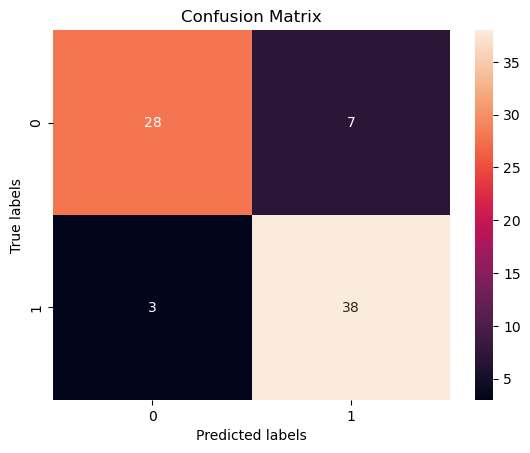

In [29]:
ax= plt.subplot()
sns.heatmap(cm_df, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1']);

We have only 10 misclassified observations out of 76 in total. 

# Decision Tree

In [30]:
X = df.copy()
X.drop("output", axis=1, inplace=True)
X.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [31]:
# Define target vector
y = df["output"].values.reshape(-1, 1)
y[:5]

array([[1],
       [1],
       [1],
       [1],
       [1]])

In [32]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [33]:
scaler = StandardScaler()  

In [34]:
# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)

In [35]:
# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [36]:
# Create the decision tree classifier instance
model = tree.DecisionTreeClassifier()

In [37]:
# Fit the model
model = model.fit(X_train_scaled, y_train)

In [38]:
# Making predictions using the testing data
predictions = model.predict(X_test_scaled)

In [39]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)


In [40]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print('\n')
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,34,8
Actual 1,5,29


Accuracy Score : 0.8289473684210527


Classification Report
              precision    recall  f1-score   support

           0       0.87      0.81      0.84        42
           1       0.78      0.85      0.82        34

    accuracy                           0.83        76
   macro avg       0.83      0.83      0.83        76
weighted avg       0.83      0.83      0.83        76



# Random Forest

In [41]:
X = df.copy()
X.drop("output", axis=1, inplace=True)
X.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [42]:
# Define target vector
y = df["output"].ravel()
y[:5]

array([1, 1, 1, 1, 1])

In [44]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [45]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [46]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [47]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [48]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=1000, random_state=78)

In [49]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [50]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [51]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [52]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print('\n')
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,36,6
Actual 1,4,30


Accuracy Score : 0.868421052631579


Classification Report
              precision    recall  f1-score   support

           0       0.90      0.86      0.88        42
           1       0.83      0.88      0.86        34

    accuracy                           0.87        76
   macro avg       0.87      0.87      0.87        76
weighted avg       0.87      0.87      0.87        76



In [53]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.1403517436745771, 'cp'),
 (0.12313450623121143, 'thall'),
 (0.11864541742014986, 'oldpeak'),
 (0.10487264715868076, 'thalachh'),
 (0.09769921382655303, 'caa'),
 (0.09129862970425448, 'age'),
 (0.07614780813574785, 'chol'),
 (0.07282003462182618, 'trtbps'),
 (0.06265821768847141, 'exng'),
 (0.047283378288833035, 'sex'),
 (0.032012819940349296, 'slp'),
 (0.02216469278672693, 'restecg'),
 (0.010910890522618543, 'fbs')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

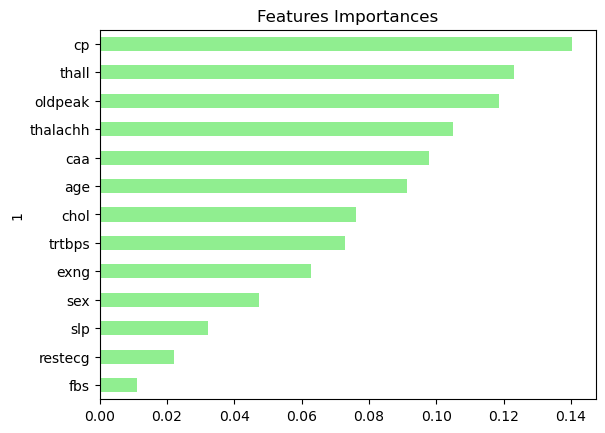

In [54]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

# Neural Network

In [56]:
# Remove output target from features data
y = df.output.values
X = df.drop(columns="output").values

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [58]:
# Preprocess numerical data for neural network

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [59]:
# Define the deep learning model 
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units=4, activation="relu", input_dim=13))
nn_model.add(tf.keras.layers.Dense(units=4, activation="relu"))
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)



# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
8/8 [==============================] - 1s 3ms/step - loss: 0.7404 - accuracy: 0.4425
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 0.7328 - accuracy: 0.4469
Epoch 3/100
8/8 [==============================] - 0s 4ms/step - loss: 0.7267 - accuracy: 0.4336
Epoch 4/100
8/8 [==============================] - 0s 4ms/step - loss: 0.7203 - accuracy: 0.4159
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 0.7143 - accuracy: 0.4159
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 0.7092 - accuracy: 0.4159
Epoch 7/100
8/8 [==============================] - 0s 2ms/step - loss: 0.7050 - accuracy: 0.4336
Epoch 8/100
8/8 [==============================] - 0s 2ms/step - loss: 0.7008 - accuracy: 0.4425
Epoch 9/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6975 - accuracy: 0.4646
Epoch 10/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.4867
Epoch 11/100
8/8 [===========

8/8 [==============================] - 0s 2ms/step - loss: 0.3504 - accuracy: 0.8673
Epoch 85/100
8/8 [==============================] - 0s 3ms/step - loss: 0.3485 - accuracy: 0.8673
Epoch 86/100
8/8 [==============================] - 0s 4ms/step - loss: 0.3465 - accuracy: 0.8673
Epoch 87/100
8/8 [==============================] - 0s 3ms/step - loss: 0.3446 - accuracy: 0.8673
Epoch 88/100
8/8 [==============================] - 0s 2ms/step - loss: 0.3433 - accuracy: 0.8673
Epoch 89/100
8/8 [==============================] - 0s 2ms/step - loss: 0.3422 - accuracy: 0.8673
Epoch 90/100
8/8 [==============================] - 0s 2ms/step - loss: 0.3408 - accuracy: 0.8673
Epoch 91/100
8/8 [==============================] - 0s 2ms/step - loss: 0.3392 - accuracy: 0.8673
Epoch 92/100
8/8 [==============================] - 0s 2ms/step - loss: 0.3373 - accuracy: 0.8717
Epoch 93/100
8/8 [==============================] - 0s 2ms/step - loss: 0.3357 - accuracy: 0.8717
Epoch 94/100
8/8 [===============

In [61]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

3/3 - 0s - loss: 0.4034 - accuracy: 0.8026 - 22ms/epoch - 7ms/step
Loss: 0.4034208655357361, Accuracy: 0.8026315569877625


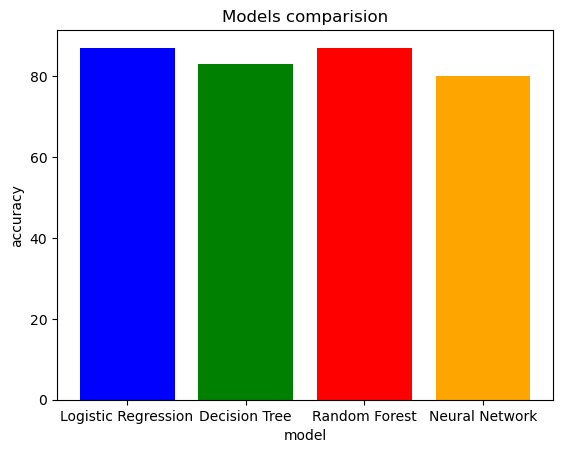

In [62]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Neural Network']
accuracy_scores = [87, 83, 87, 80]

plt.bar(models, accuracy_scores, color=['blue', 'green', 'red', 'orange'])
plt.xlabel('model')
plt.ylabel('accuracy')
plt.title('Models comparision')
plt.show()

Since, the Logistic regression and Random Forest models gave the highest accuracy of 87%, we decided to go with one of the two models for this project, and we chose Logistic regression for further optimization.

### LOGISTIC REGRESSION 2 (Increased the max_iter)

In [63]:
y = df["output"]
X = df.drop(columns="output")


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

# Create the Logistic Regression classifier
classifier = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=1)

# Train the classifier
classifier.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=1)

In [64]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.8451327433628318
Testing Data Score: 0.8552631578947368


In [65]:
predictions = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
results.head()

,Prediction,Actual
0,0,0
1,0,0
2,0,0
3,0,1
4,0,0


In [66]:
# Display the accuracy score for the test dataset.
accuracy_score(y_test, predictions)

0.8552631578947368

In [67]:
#Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)


In [68]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print('\n')
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,27,8
Actual 1,3,38


Accuracy Score : 0.8552631578947368


Classification Report
              precision    recall  f1-score   support

           0       0.90      0.77      0.83        35
           1       0.83      0.93      0.87        41

    accuracy                           0.86        76
   macro avg       0.86      0.85      0.85        76
weighted avg       0.86      0.86      0.85        76



### LOGISTIC REGRESSION 3 (scaled data)

In [69]:
# Extract the target variable (output) and features
y = df["output"]
X = df.drop(columns="output")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

# Create the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the Logistic Regression classifier
classifier = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=1)

# Train the classifier on the scaled data
classifier.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000, random_state=1)

In [70]:
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Training Data Score: 0.8451327433628318
Testing Data Score: 0.8552631578947368


In [71]:
predictions = classifier.predict(X_test_scaled)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
results.head()

,Prediction,Actual
0,0,0
1,0,0
2,0,0
3,0,1
4,0,0


In [72]:
# Display the accuracy score for the test dataset.
accuracy_score(y_test, predictions)

0.8552631578947368

In [73]:
#Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)


In [74]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print('\n')
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,27,8
Actual 1,3,38


Accuracy Score : 0.8552631578947368


Classification Report
              precision    recall  f1-score   support

           0       0.90      0.77      0.83        35
           1       0.83      0.93      0.87        41

    accuracy                           0.86        76
   macro avg       0.86      0.85      0.85        76
weighted avg       0.86      0.86      0.85        76



### LOGISTIC REGRESSION 4 (Feature Selection & Scaled)

Optimization terminated successfully.
         Current function value: 0.348265
         Iterations 7


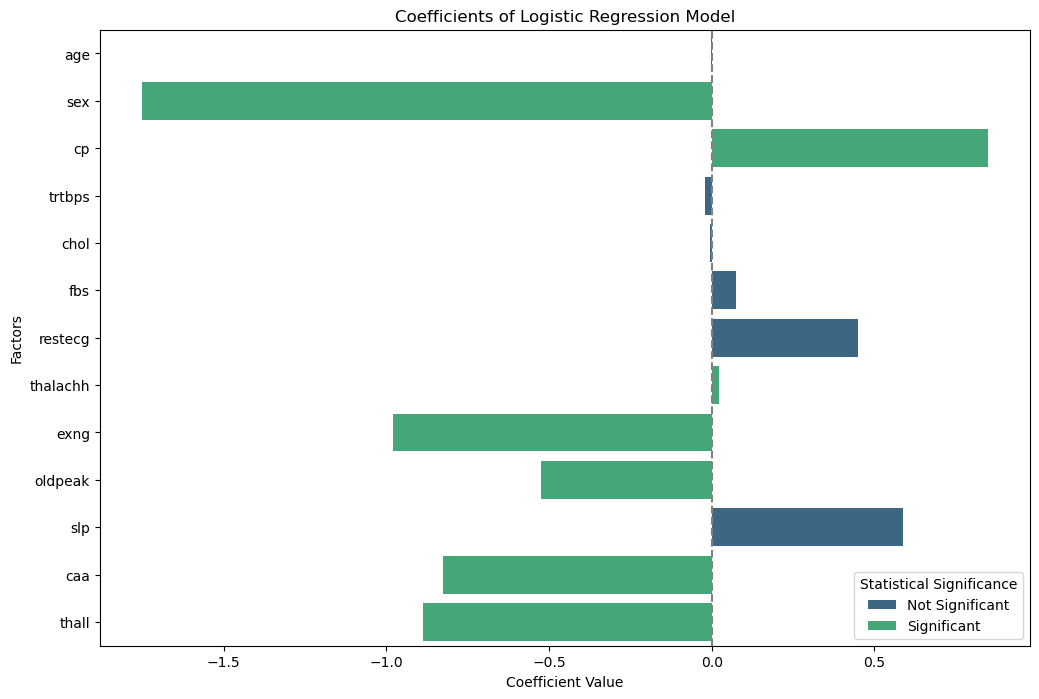

,Factors,Coefficients,P-Values,Significance
0,age,-0.001469,0.950062,Not Significant
1,sex,-1.750930,0.000184,Significant
2,cp,0.847283,0.000005,Significant
3,trtbps,-0.020188,0.051916,Not Significant
4,chol,-0.004489,0.238252,Not Significant
5,fbs,0.073463,0.890263,Not Significant
6,restecg,0.450607,0.196022,Not Significant
7,thalachh,0.023134,0.026835,Significant
8,exng,-0.981017,0.016672,Significant
9,oldpeak,-0.523604,0.014630,Significant


In [75]:
# Preparing the data for logistic regression
X = df.drop('output', axis=1)  # Independent variables
y = df['output']  # Dependent variable

# Adding a constant to the model (intercept)
X_const = sm.add_constant(X)

# Building the logistic regression model
model = sm.Logit(y, X_const)
result = model.fit()

# Extracting coefficients and p-values
coefficients = result.params[1:]  # Excluding the intercept
p_values = result.pvalues[1:]  # Excluding the intercept for p-values

# Creating a dataframe for visualization
viz_df = pd.DataFrame({
    'Factors': coefficients.index,
    'Coefficients': coefficients.values,
    'P-Values': p_values.values
})

# Adding a column for the significance of coefficients
viz_df['Significance'] = np.where(viz_df['P-Values'] <= 0.05, 'Significant', 'Not Significant')

# Plotting the coefficients
plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficients', y='Factors', data=viz_df, hue='Significance', dodge=False, palette='viridis')
plt.title('Coefficients of Logistic Regression Model')
plt.xlabel('Coefficient Value')
plt.ylabel('Factors')
plt.axvline(x=0, color='grey', linestyle='--')
plt.legend(title='Statistical Significance', loc='lower right')

plt.show()

viz_df

In [76]:
df1 = df[['sex', 'cp', 'thalachh', 'exng', 'oldpeak', 'caa', 'thall', 'output']]
df1.head()

,sex,cp,thalachh,exng,oldpeak,caa,thall,output
0,1,3,150,0,2.3,0,1,1
1,1,2,187,0,3.5,0,2,1
2,0,1,172,0,1.4,0,2,1
3,1,1,178,0,0.8,0,2,1
4,0,0,163,1,0.6,0,2,1


In [77]:
# Extract the target variable (output) and features
y = df1["output"]
X = df1.drop(columns="output")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

# Create the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the Logistic Regression classifier
classifier = LogisticRegression(solver='lbfgs', max_iter=200, random_state=1)

# Train the classifier on the scaled data
classifier.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=200, random_state=1)

In [78]:
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Training Data Score: 0.8362831858407079
Testing Data Score: 0.8552631578947368


In [79]:
predictions = classifier.predict(X_test_scaled)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
results.head()

,Prediction,Actual
0,0,0
1,0,0
2,0,0
3,0,1
4,0,0


In [80]:
# Display the accuracy score for the test dataset.
accuracy_score(y_test, predictions)

0.8552631578947368

In [81]:
#Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)


In [82]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print('\n')
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,28,7
Actual 1,4,37


Accuracy Score : 0.8552631578947368


Classification Report
              precision    recall  f1-score   support

           0       0.88      0.80      0.84        35
           1       0.84      0.90      0.87        41

    accuracy                           0.86        76
   macro avg       0.86      0.85      0.85        76
weighted avg       0.86      0.86      0.85        76



After optimizing further the dataset, the accuracy doesn't change much in all the cases of LR model. 